# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

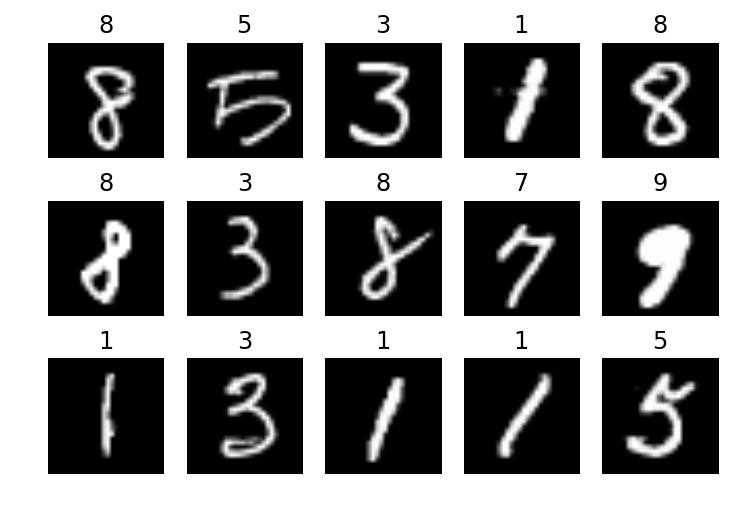

In [2]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    blank =  np.zeros((height,width,1))
    for i in range(X_len):
        num = random.randint(1,n_len)
        tempX = np.zeros((height,0))
        for j in range(n_len):
            if j < num:
                index = random.randint(0,X_len-1)
                X_gen[i,:,width*j:width*(j+1),:] = X[index].reshape((height,height,1))
                y_gen[j][i][y[index]] = 1
            else:
                # 空白
                X_gen[i,:,width*j:width*(j+1),:] = blank
                y_gen[j][i][n_class-1] = 1
    return X_gen, y_gen

X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw,y_raw,test_size=0.2,random_state=0)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

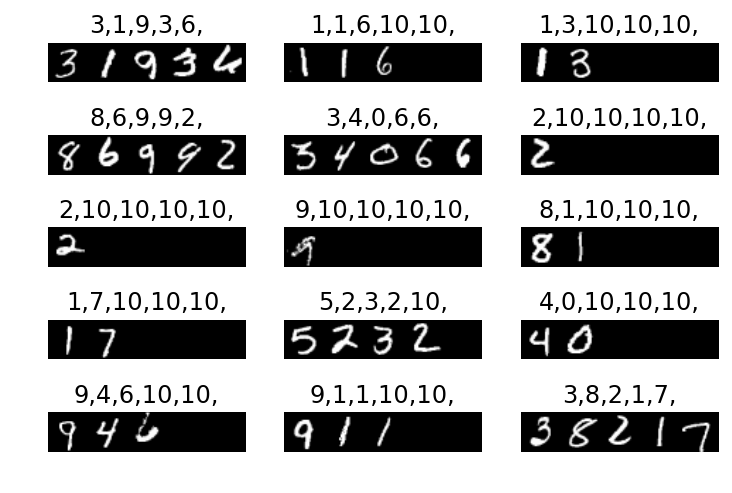

In [4]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**

合成数据集方法如下:

1.先随机生成1个1~5的随机数，设为n

2.随机生成n个索引

2.将这n个索引对应的图片重组成一张图片（n小于5时用空白图片补全）

3.新lable的shape为(5,X_len,11),利用n个索引取出对应图片的label,此处假设为x,将新label最后一维下标为x的数值设为1，利用5个label合成新label

----
为什么要分训练集，验证集和测试集？

训练集是用于训练模型；

验证集是用于优化模型，调整模型参数；

测试集是测试训练好的模型的效果。

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [5]:
from keras.models import Model
from keras.layers import *

# TODO: 构建你的模型
inputs = Input(shape=(height, width*n_len,1))
x=Conv2D(32,(3,3),padding='same',activation='relu')(inputs)
x=MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
x=Conv2D(64,(3,3),padding='same',activation='relu')(x)
x=MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
x=Conv2D(128,(3,3),padding='same',activation='relu')(x)
x=MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)

outputs = [Dense(n_class,activation='softmax')(x) for i in range(n_len) ]
model=Model(inputs=inputs,outputs=outputs)

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 

使用卷积神经网络

卷积神经网络就是让权重在不同位置共享的神经网络，适用于处理大型图片。一般的卷积神经网络的部件其实大致分为三个，卷积层、池化层、全连接层。卷积层可以不断提取特征，并且随着层数的增加，其识别的特征也越来越抽象。池化层主要功能是downsamping，却不会损坏识别结果。而最后的全连接层对前面得到的特征做加权和用来进行分类。


### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

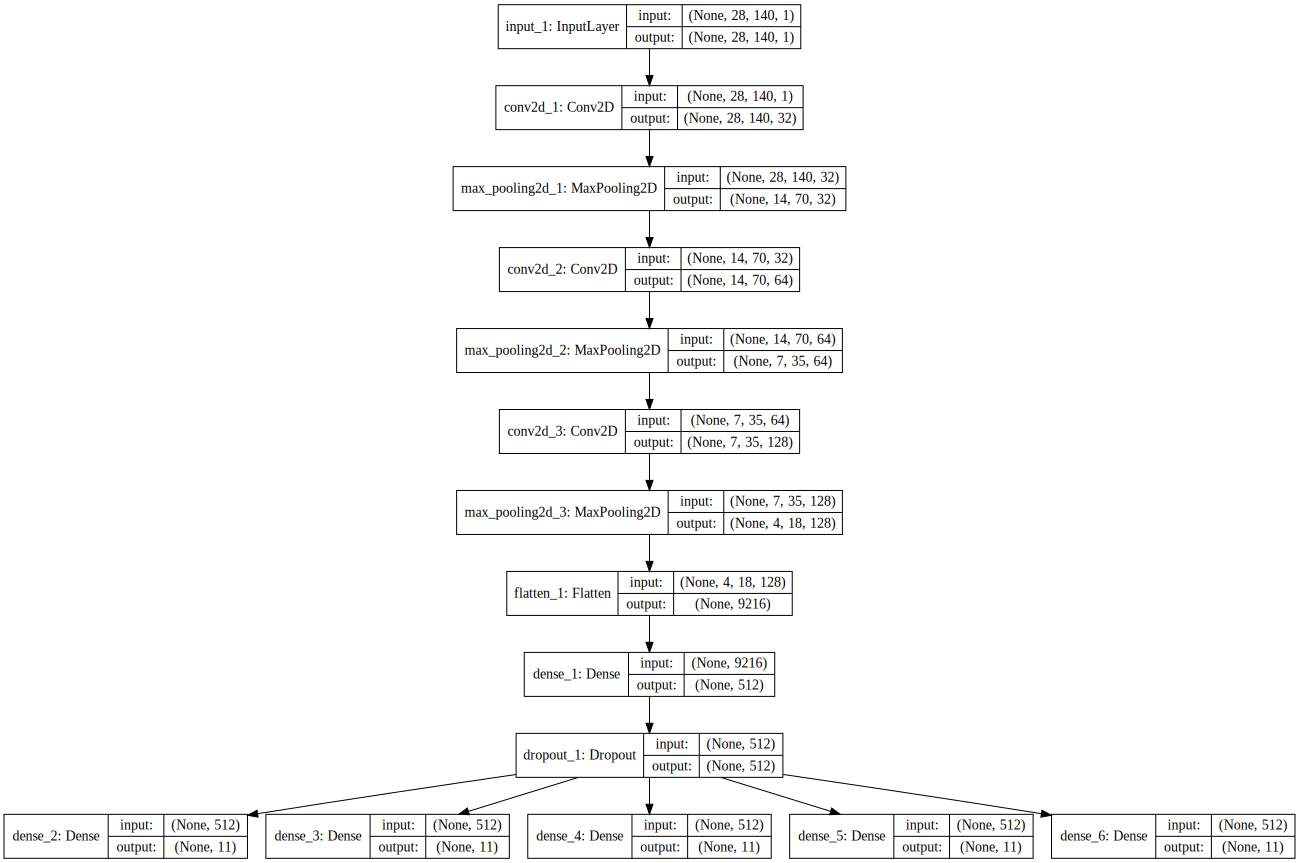

In [6]:
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
plot_model(model, to_file='model.png')
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**

使用keras泛型模型，一共有11层,其中每一层大小如下：

1.input层，输出shape为(28,140,1)

2.Conv层，输出shape为(28,140,32)

3.Pooling层，输出shape为(14,70,32)

4.Conv层，输出shape为(14,70,64)

5.Pooling层，输出shape为(7,35,64)

6.Conv层，输出shape为(7,35,128)

7.Pooling层，输出shape为(4,18,128)

8.flatten层，输出shape为(9216)

9.dense层,输出shape(512)

10.dropout层0.5，输出shape()

11.dense输出，5个输出shape(11)


### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [19]:
import keras
# TODO: 训练你的模型
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_valid, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 86s - loss: 3.1370 - dense_26_loss: 0.8348 - dense_27_loss: 0.7852 - dense_28_loss: 0.6641 - dense_29_loss: 0.5089 - dense_30_loss: 0.3439 - dense_26_acc: 0.8464 - dense_27_acc: 0.8548 - dense_28_acc: 0.8725 - dense_29_acc: 0.8966 - dense_30_acc: 0.9299 - val_loss: 0.2722 - val_dense_26_loss: 0.0791 - val_dense_27_loss: 0.0670 - val_dense_28_loss: 0.0605 - val_dense_29_loss: 0.0403 - val_dense_30_loss: 0.0253 - val_dense_26_acc: 0.9765 - val_dense_27_acc: 0.9799 - val_dense_28_acc: 0.9819 - val_dense_29_acc: 0.9880 - val_dense_30_acc: 0.9918
Epoch 2/10
48000/48000 [==============================] - 85s - loss: 0.4345 - dense_26_loss: 0.1103 - dense_27_loss: 0.1002 - dense_28_loss: 0.0924 - dense_29_loss: 0.0775 - dense_30_loss: 0.0540 - dense_26_acc: 0.9670 - dense_27_acc: 0.9689 - dense_28_acc: 0.9720 - dense_29_acc: 0.9769 - dense_30_acc: 0.9838 - val_loss: 0.1780 - val_dense_2

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [29]:
def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率
    count = 0
    pred = model.predict(X_test)
    for index in range(X_test.shape[0]):
        isSame = True
        for i in range(n_len):
            if np.argmax(y_test[i][index]) != np.argmax(pred[i][index]):
                isSame = False
        if isSame == True:
            count+=1
    print(float(count)/X_test.shape[0])

evaluate(model)

0.9638


### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**

模型准确率为96.38%，对于解决一些简单的数字识别问题该模型应该是足够了,但如果在一些需要精确识别的场景，这个精度就显得有些低。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

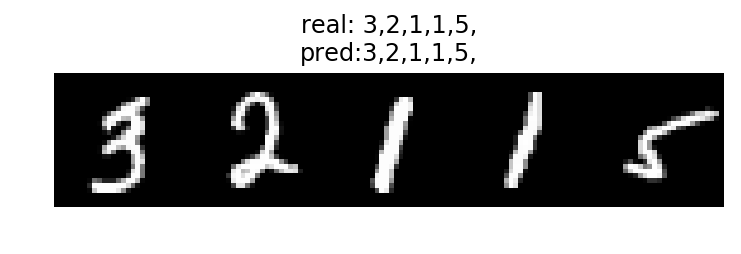

In [30]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [31]:
model.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())